# Grundkurs Python

Dieses Notebook dient als einführung in die Datenverarbeitung mit Python. 

## 03. Grundlegende Programmierlogik
Hier werden die Basisalgorithmen erklärt, mit denen sich der logische Teil von etwa 90% (ganz grob geschätzt) aller Aufgaben durchführen lässt. Später sollte man diese Algorithmen aber wenn möglich vermeiden selbst zu programmieren, da Sie meistens in vorhanden Bibliotheken bereits für den jeweiligen Kontext/Datentyp effizienter implementiert sind.

### Funktionen (Functions)
Programmierung erfordert oft, dass eine Reihe von Aufgaben immer wiederholt ausgeführt wird. Ein Beispiel dafür ist die Funktion math.sin in Python, die eine Reihe von Aufgaben (d.h. mathematische Operationen) ausführt, um eine Näherung für sin(x) zu berechnen. Anstatt diese Anweisungen jedes Mal erneut einzugeben oder zu kopieren, wenn du die sin-Funktion verwenden möchtest, ist es nützlich, diese Anweisungen als Funktion zu speichern, die du immer wieder aufrufen kannst.

#### Funktionen verwenden
Um Funktionen zu verwenden, muss der Name, gefolgt von runden Klammern eingegeben werden:
```
function_name(argument_x, argument_y, argument_z, ...)
```
Wie im Beispiel können Funktionen Argumente in den Klammern übergeben werden. Ob und welche Argumente das sind, hängt davon ab wie die Funktion definiert wurde. Das lernen wir in den nächsten Schritten. Z.B. gibt es im Modul `math` von Python bereits die Funktion `sin`, um den Sinus zu berechnen. Allerdings wie in der mathematischen Funktion braucht die Funktion einen x-Wert, um einen y-Wert zu berechnen:

In [ ]:
import math
import numpy as np
# Man kann z.B. die existierende Funktion sin im Modul math direkt verwenden
x = 0.5 * math.pi
y = math.sin(x)
# Numerische Ungenauigkeiten können z.B. durch die existierende Funktion round aus dem Modul numpy
y

Meistens sind Funktionen so programmiert, dass sie einen Wert oder ein Ergebnis zurück geben (`return`), den man für die spätere Nutzung in einer Variable speichern kann. Somit ähneln Funktionen in der Programmierung: 
```
y = math.sin(x)
```
denen in der Mathematik:
$$
  y = sin(x)
$$

**Python:**
```
result_1, ..., result_m = function_name(argument_1, ..., argument_n, *args, **kwargs)
```

**Mathematik:**
$$
  y_1, ..., y_m = f(x_1, ..., x_n)
$$



#### Funktionen erstellen / definieren

**Wann?**
* Wenn dasselbe Stück Programmcode oder derselbe Algorithmus mehrfach wiederholt wird.  
  * Einerseits spart es die Arbeit immer wieder denselben Code zu schreiben/kopieren,  
  * andererseits macht es das Programm kürzer und übersichtlicher  
  * Wenn Teile nachträglich korrigiert/angepasst werden, muss es nur einmal gemacht werden, was Fehler reduziert.  
* Funktionen helfen bei der Strukturierung des Programms. Sie ermöglichen, das Programm in viele kleinere Submodule zu zerlegen um zur Übersichtlichkeit und Korrektur/Debugging beizutragen.

***Wie?***

* Funktionsdefinition wird immer über das Keyword `def` angeführt.
* Nach einem Leerzeichen der Funktionsname,
* direkt von Klammern gefolgt, welche mögliche Argumente enthalten,
* wiederum gefolgt von einem Doppeltpunkt (`:`).
* Einrückung des Funktionskörpers (Inhalt der Funktion) wird danach eingerückt.
* **Grundsätzlich markieren Einrückungen immer einen Abschnitt/Block in Python und werden vom Interpreter verlangt** (bzw. ist der Code fehlerhaft, wenn sie nicht entsprechend berücksichtigt werden).
* Eine Funktion sollte am Schluss meistens ein oder mehrere Ergebnisse/Werte/Variablen zurückgeben (`return`):

```
def function_name(argument_a, argument_b, ...):
    do something here
    return something
```

In [ ]:
# Was macht folgende Funktion?
def function_name():
    pass

In [ ]:
# Ein sinnvollere Funktion könnte z.B. die Addition sein:
def addition(x, y):
    return x + y

In [ ]:
# Test
addition(1, 2)

Allerdings ist diese Funktion auch nicht so sinnvoll, da es den `+` Operator schon gibt. Lasst uns eine "sinnvolle" Funktion programmieren. Zum Beispiel eine Funktion, welche die Strom-Spannungs-Beziehung einer Brennstoffzelle berechnen kann:
$$
  V = f(i)
$$

aus *Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009*:

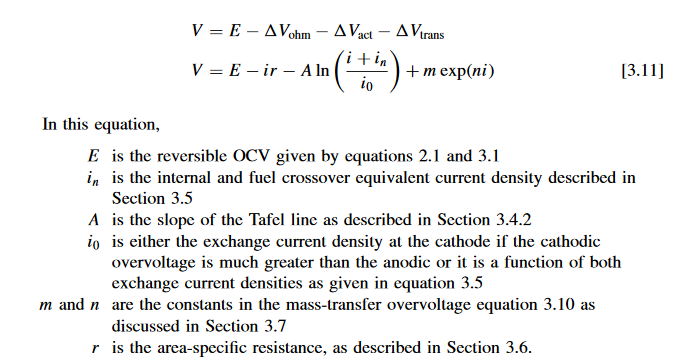

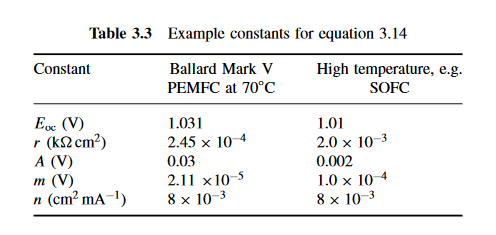


In [ ]:
def calc_polarization(current_density):
    """
    Calculation of fuel cell voltage for a given current density according to Equation 3.11. Parameters according to Table 3.3 in:    
    Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009
    for the Ballard Mark V PEMFC at 70°C.
    """
    open_circuit_voltage = 1.031
    tafel_slope = 0.03
    ohmic_resistance = 0.000245 * 2.0
    mtr_factor = 2.11e-5
    mtr_exponent = 0.008
    voltage = (open_circuit_voltage - ohmic_resistance * current_density 
        - tafel_slope * np.log(current_density) 
        - mtr_factor * np.exp(mtr_exponent * current_density))
    return voltage

In [ ]:
voltage_1 = calc_polarization(100)
voltage_2 = calc_polarization(500)
voltage_3 = calc_polarization(1000)

Wie können wir daraus eine Kurve (mehrere Werte-Paare) erzeugen?

### Schleifen/Iterationen (For und While Loops)
**Wofür?**
* Wiederholte Ausführung einer Aufgabe, meistens mit Variationen

**Wie?**
* "for"-Schleife mit `for iterator in iterable:`
    * vordefinierte Anzahl an Wiederholungen durch Länge von `iterable`
    * deutlich häufigere Verwendung
* "while"-Schleife mit `while condition:`
    * vorerst undefinierte Anzahl an Wiederholungen
    * Bedingung `condition` definiert Abbruchkriterium
    * seltener notwendig

#### For-Schleifen
* fast immer das erste Mittel der Wahl für Iterationen

In [ ]:
# Einfache Tests mit "for"-Schleifen (loops)
for i in range(10):
    print('Hello World')

Die "range"-Funktion gibt einen "range"-Datentyp zurück, was aber wie andere Sequenzen (list, tuple, set, dictionary, ...) ein "iterable"-Objekt ist. D.h. Python weiß, dass es mit einer "for"-Schleife darüber iterieren kann.

In [ ]:
# Der Variablentype kann mit der Funktion "type" abgefragt werden
print(type(range(10)))

In [ ]:
for i in range(10):
    print('Hello World ' + str(i))

In [ ]:
# Achtung, folgend wird eine Comprehension verwendet, um die Liste zu erstellen. Das bedeutet, dass eine Liste direkt über 
# eine for-Schleife in einer Zeile erstellt wird. Das ist oft kürzer, eleganter und schneller, wenn man mit 
# dem Konzept vertraut ist.
number_list = [i for i in range(10)]
for i in number_list:
    print('Hello World ' + str(i * 2))

In [ ]:
# Auch über Listen mit anderen Datentypen kann man iterieren
name_list = ["Ich", "kann", "programmieren"]
for i in name_list:
    print(i)

In [ ]:
# Wenn der Iterator/die Zählvariable lieber numerisch sein soll:
for i in range(len(name_list)):
    print(i, name_list[i])

In [ ]:
# Alternativ kann die "enumerate"-Funktion verwendet werden, 
# um direkt Zähler und den jeweiligen Listeneintrag zu erhalten.
for i, name in enumerate(name_list):
    print(i, name)

In [ ]:
sentence = ''
for i in range(len(name_list)):
    sentence += name_list[i] + ' '
print(sentence)

In [ ]:
# Diese Aufgabe kann mit funktionen des Datentypen "str" direkt in einer Zeile erledigt werden.
print(' '.join(name_list))

#### While-Schleifen
* while-Schleifen werden deutlich selter gebraucht
* for-Schleifen sind fast immer durch while-Schleifen ersetzbar, jedoch umständlicher
* while-Schleifen sind notwendig, wenn die Anzahl der Durchläufe nicht bekannt ist
* Die Schleife kann entweder durch die definierte Abbruchbedingung oder durch das Keyword `break` unterbrochen werden

In [ ]:
# Unendliche Schleife
while True:
    x = 1

In [ ]:
# Um eine Abbruchbedingung einzubauen wird folgend auf Verzweigungen vorgegriffen
x = 0
while True:
    x += 1
    print(x)
    if x > 5:
        break

In [ ]:
# Abbruch direkt in der Schleifendefinition:
x = 0
while (x <= 5):
    x += 1
    print(x)

### Verzweigungen (If-Else)
Mit Wenn-Dann-Verzweigungen (If-Else) sind Abfragen um Aktionen nur dann durchzuführen, wenn bestimmte Vorraussetzungen erfüllt sind, oder ggfs. alternative Aktionen durchzuführen. Hauptsächlich gibt es drei Abfragen: `if`, `elif` (kurz für else-if) und `else`. `if` kann auch für sich alleine stehen, die anderen beiden nur in Kombination mit einem vorangegangenen `if`-Block.

In [ ]:
x = 1
if x == 1:
    print('Hello World')

In [ ]:
x = None
if x == 0:
    print('Hello World')
elif x is None:
    print('Bye World')
else:
    print('Hello new World')

#### Kombination aus Funktionen und Schleifen
Wie können wir nun mit unser vorher definierten Funktion `calc_polarization` eine ganze Polarizationskurve rechnen?

Genau, mit einer Schleife!
Dazu brauchen wir zunächst mehrere Stromdichtewerte, z.B. in einer Liste.

In [ ]:
# Manuelle Erstellung der Liste
current_density = [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]

In [ ]:
# Einfacher mit list comprehension
current_density = [(i + 1) * 100.0 for i in range(10)]

In [ ]:
# Leere Liste erstellen
voltage = []
# for-Loop Definition: iteriere durch die unterschiedlichen Stromdichten
for i in current_density:  
    # Berechne für jede Stromdichte einen Werte
    result = calc_polarization(i)
    # Erweitere die vormals leere Liste in jeder Iteration um den berechneten Spannungswert
    voltage.append(result)
# Gib das Ergebnis aus
print(voltage)

#### Anwendung von Numpy

Wie bereits angedeutet, gibt es für viele typische Tätigkeiten bereits viele Bibliotheken und Module, worauf aufgebaut werden kann. Ein wichtiges Modul für numerische Berechnungen mit Vektoren und Matrizen ist **NumPy**. Neben komplexen Berechnung ist es aber auch für alle aber auch alle möglichen Tätigkeiten, wo ein Vektor/Array/Liste von Zahlen verwendet wird kann.

Vergleiche die vorherige, umständliche Berechnung der Polarisationskurve in einer Schleife mit folgender Ausführung. Außerdem ist die folgende Berechnung deutlich schneller, da sie mit der für Array-Operationen optimierten Bibliothek NumPy durchgeführt wurde.

In [ ]:
import numpy as np
current_density = np.linspace(100.0, 1000.0, 10)
voltage = calc_polarization(current_density)

In [ ]:
current_density

#### Dateien schreiben und lesen (File I/O)

Hier wird gezeigt, wie man mit Python-Grundfunktionen Textdateien schreiben und lesen kann.

**Hinweis**: Wie im 4. Teil des Workshops gezeigt, sollte man für große Datentabellen spezialisierte Funktionen, wie z.B. pandas.read_csv(), verwenden. Jedoch gibt es immer wieder Dateien mit speziellem Format, welches eine angepasste Lesefunktion erfordert. Dafür ist es sinnvoll mit den Grundfunktionen vertraut zu sein. 

Nun wollen wir erst die berechneten Ergebnisse in einer Datei speichern:
* dazu muss man eine Datei öffnen (wenn nicht bereits vorhanden wird sie erstellt): mit der Funktion `open`
* und schließen (wichtig!) mit der Funktion `close`
* falls man das Konstrukt `with open` verwendet, wird die Datei automatisch nach dem Block geschlossen
  (fast immer zu empfehlen!)
* um in der Datei zu schreiben, besitzt die File-Handle-Variable Funktionen wie
    * `write`: schreibe den vorgegebenen Text (`str`) in die aktuelle Zeile der Datei
    * `writelines`: schreibe die übergebene Liste von Strings in die Datei.
* in der `open`-Funktion gibt man als weiteres Argument den Öffnungsmodus wie `w` (lesen & schreiben), `r` (nur lesen) und `a` (anhängen) an

Um in der Ordnerstruktur des Systems mit Python zu navigieren und zu arbeiten, gibt es die Bibliothek `os` (Funktionen für das jeweilige Operating System) mit dem Untermodul `path` (zur Navigation und Bearbeitung von Dateipfaden, Ordnern, etc.)

In [ ]:
# Erstellung des Dateipfades
import os
file_name = 'results_2.csv'
result_directory = 'result_directory'
if not os.path.exists(result_directory):
    os.makedirs(result_directory)
file_path = os.path.join(result_directory, file_name)

In [ ]:
# Nun können wir in die Datei schreiben
with open(file_path, "w") as result_file:
    result_file.write('Current Density [W/m2], Voltage [V]\n')
    for i in range(len(current_density)):
        result_line = ', '.join([str(current_density[i]), str(voltage[i])]) + '\n'
        result_file.write(result_line)

Nun wollen wir die Ergebnisse aus einer Datei lesen:
* wie zuvor beschrieben muss die Datei geöffnet werden
* um in der Datei zu schreiben, besitzt die File-Handle-Variable Funktionen wie
    * `read`: lese die aktuelle Zeile als String(`str`) aus der Datei
    * `readlines`: lese alle Zeilen als Liste von Strings aus der Datei

In [ ]:
# Hier  wird angenommen, dass mit den vorher gezeigten Programmabschnitten, 
# zwei verschiedene Dateien ("results_1.csv" und "results_2.csv"), 
# z.B. durch Variation der Parameter in der calc_polarization-Funktion, bereits abgespeichert wurden.
file_list = ['results_1.csv', 'results_2.csv']
current_densities = []
voltages = []
for i, file in enumerate(file_list):
    file_path = os.path.join(result_directory, file)
    with open(file_path, 'r') as file:
        result_lines = file.readlines()
    del result_lines[0]
    current_density = []
    voltage = []
    for line in result_lines:
        line_list = line.split(', ')
        current_density.append(float(line_list[0].strip()))
        voltage.append(float(line_list[-1].strip()))
    current_densities.append(current_density)
    voltages.append(voltage)

print(current_densities)

In [ ]:
print(voltages)

In [ ]:
# Importiere das Submodul "pyplot" aus der Bibliothek "maplotlib"
from matplotlib import pyplot as plt
# Erstelle einen Plot ohne Inhalt
fig, ax = plt.subplots()
# Erstelle Listen zur optischen Konfiguration für die unterschiedlichen Plots,
# hier optischer Overkill zur Darstellung der typischen Optionen
labels = ['Reference', 'Increased ohmic resistance']
linestyles = ['solid', 'dotted']
markers = ['o', 'x']
colors = ['blue', 'red']
# Iteriere durch die eingelesenen Ergebnisse, 
# welche in den Listen "current_densities" und "voltages" gespeichert wurden,
# und erstelle die jeweiligen Plots mit entsprechender Formatierung
for i in range(len(current_densities)):
    ax.plot(current_densities[i], voltages[i], label=labels[i], color=colors[i],
            linestyle=linestyles[i], marker=markers[i], linewidth=1.0)
# Erstelle einen x-Achsenbeschriftung
ax.set_xlabel("Current Density / $mA/cm²$", fontsize=14)
ax.set_ylabel("Voltage / V", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_title("Comparison of Fuel Cell Polarization Curves")
# Zeige den Plot an
plt.show()

### Zusatzinformation zu Parameter/Variablen in Funktionen

Wie können wir unterschiedliche Brennstoffzellkurven z.B. bei anderen Betriebsbedingungen darstellen?
Die Parameter können geändert werden. Um die Funktion nicht jedesmal neu zu schreiben gibt, es verschiedene Möglichkeiten:

In [ ]:
# Globale Parameter (für kleine Skripte in Ordnung, für größere Programme sollte man davon absehen)
# Grundsätzlich sollte die Variabelbenennung einem bestimmten Standard (PEP 8) folgen 
# und ganze, beschreibende Wörter (kleingeschrieben, mit Unterstrich getrennt) verwenden
open_circuit_voltage = 1.031
tafel_slope = 0.03
ohmic_resistance = 0.000245
mtr_factor = 2.11e-5
mtr_exponent = 0.008

def calc_polarization(current_density):
    """
    Calculation of fuel cell voltage for a given current density according to Eq. 3.14 in:   
    Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009
    """
    voltage = (open_circuit_voltage - ohmic_resistance * current_density 
               - tafel_slope * math.log(current_density) 
               - mtr_factor * math.exp(mtr_exponent * current_density))
    return voltage
calc_polarization_curve(1000)

In [ ]:
# Als Funktionsargumente mit Standard(Default)-werten
def calc_polarization(current_density, open_circuit_voltage=1.031, tafel_slope=0.03, 
                      ohmic_resistance=0.000245, mtr_factor=2.11e-5, mtr_exponent=0.008):
    """
    Calculation of fuel cell voltage for a given current density according to Eq. 3.14 in:   
    Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009
    """
    voltage = (open_circuit_voltage - ohmic_resistance * current_density 
               - tafel_slope * math.log(current_density) 
               - mtr_factor * math.exp(mtr_exponent * current_density))
    return voltage
calc_polarization_curve(1000)

In [ ]:
# Falls die Argumentenliste zu groß wird (> 5), bietet es sich an, bestimmte Argumente in anderen Datentypen zu speichern, z.B. in einem Dictionary
def calc_polarization(current_density, parameters: dict = None):
    """
    Calculation of fuel cell voltage for a given current density according to Eq. 3.14 in:   
    Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009
    """
    if parameters is None:
        open_circuit_voltage = 1.031
        tafel_slope = 0.03
        ohmic_resistance = 0.000245
        mtr_factor = 2.11e-5
        mtr_exponent = 0.008
    else:
        open_circuit_voltage = parameters["open_circuit_voltage"]
        tafel_slope = parameters["tafel_slope"]
        ohmic_resistance = parameters["ohmic_resistance"]
        mtr_factor = parameters["mtr_factor"]
        mtr_exponent = parameters["mtr_exponent"]
    voltage = (open_circuit_voltage - ohmic_resistance * current_density 
               - tafel_slope * math.log(current_density)
               - mtr_factor * math.exp(mtr_exponent * current_density))
    return voltage
calc_polarization_curve(1000)

In [ ]:
# Alternativ:
def calc_polarization(current_density, parameters: dict = None):
    """
    Calculation of fuel cell voltage for a given current density according to Eq. 3.14 in:   
    Larminie, James, and Andrew Dicks. Fuel Cell Systems Explained. 2. ed., Repr. Chichester: Wiley, 2009
    """
    if parameters is None:
        parameters = {
            "open_circuit_voltage": 1.031,
            "tafel_slope": 0.03,
            "ohmic_resistance": 0.000245,
            "mtr_factor": 2.11e-5,
            "mtr_exponent": 0.008
        }
        
    voltage = (parameters["open_circuit_voltage"] - parameters["ohmic_resistance"] * current_density 
               - parameters["tafel_slope"] * math.log(current_density) 
               - parameters["mtr_factor"] * math.exp(parameters["mtr_exponent"] * current_density))
    return voltage
calc_polarization_curve(1000)